<a href="https://colab.research.google.com/github/Erinywang/ds4ph-bme/blob/master/Yiran_Wang_assignment8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import urllib.request
import PIL
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [ ]:

imgURL = "https://raw.githubusercontent.com/larvalabs/cryptopunks/master/punks.png"
urllib.request.urlretrieve(imgURL, "cryptoPunksAll.jpg")


In [ ]:
img = PIL.Image.open("cryptoPunksAll.jpg").convert("RGB")
img

In [ ]:
finalArray = np.empty((10000,24,24,3))
for i in range(100):
  for j in range(100):
    a, b = 24 * i, 24 * (i + 1)  
    c, d = 24 * j, 24 * (j + 1) 
    idx = j + i * (100)
    finalArray[idx,:,:,:] = imgArray[a:b,c:d,:]

In [ ]:
plt.figure(figsize = (10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.imshow(finalArray[i,:,:,:].astype('uint8'))

In [ ]:
finalArray.shape

(10000, 24, 24, 3)

In [ ]:
baseUrl = "https://raw.githubusercontent.com/cryptopunksnotdead/punks/master/"
for i in range(0,10000, 1000):
  url = baseUrl+str(i)+"-"+str(i + 999)+".csv"
  print(url)
  if (i == 0):
    dat = pd.read_csv(url)
  else :
    dat = pd.concat ([dat, pd.read_csv(url)], 
                     join = 'inner',
                     ignore_index = True)



In [ ]:
dat = dat.assign(earring= (dat[' accessories'].str.find("Earring") > 0) * 1)


Creat Convolutional Base

In [ ]:
model =  models.Sequential()
model.add(layers.Conv2D(24,(3,3), activation = 'relu', input_shape = (24,24,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(48,(3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(48,(3,3), activation = 'relu'))

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(48, activation = 'relu'))
model.add(layers.Dense(10))

In [ ]:
model.summary()

Prepare dataset

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(finalArray,
                                                    dat.earring,
                                                    test_size=0.3,
                                                    random_state=42)

Compile and train the **model**

In [ ]:
model.compile(optimizer= 'adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics = ['accuracy'])

history = model.fit(x_train, y_train,epochs=10,
                    validation_data=(x_test, y_test))

Epoch 1/10
219/219 [==============================] - 6s 24ms/step - loss: 1.8325 - accuracy: 0.7816 - val_loss: 0.2171 - val_accuracy: 0.9323
Epoch 2/10
219/219 [==============================] - 5s 22ms/step - loss: 0.2095 - accuracy: 0.9291 - val_loss: 0.2383 - val_accuracy: 0.8880
Epoch 3/10
219/219 [==============================] - 5s 22ms/step - loss: 0.1681 - accuracy: 0.9360 - val_loss: 0.1564 - val_accuracy: 0.9353
Epoch 4/10
219/219 [==============================] - 5s 22ms/step - loss: 0.1466 - accuracy: 0.9411 - val_loss: 0.1510 - val_accuracy: 0.9347
Epoch 5/10
219/219 [==============================] - 5s 22ms/step - loss: 0.1220 - accuracy: 0.9493 - val_loss: 0.1519 - val_accuracy: 0.9293
Epoch 6/10
219/219 [==============================] - 5s 21ms/step - loss: 0.1259 - accuracy: 0.9488 - val_loss: 0.1535 - val_accuracy: 0.9470
Epoch 7/10
219/219 [==============================] - 5s 22ms/step - loss: 0.1174 - accuracy: 0.9498 - val_loss: 0.1401 - val_accuracy: 0.9463

Evaluate accuracy

94/94 - 1s - loss: 0.1362 - accuracy: 0.9443


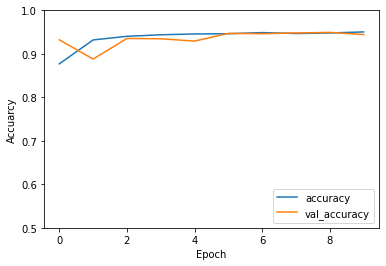

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuarcy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)

In [ ]:
print(test_acc)

0.9443333148956299
